# Neural Network - MNIST
- MNIST data
- 2 layer neural network

## 1. Settings
### 1) Import required libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt


### 2) Set hyperparameters

In [2]:
batch_size = 100
learning_rate = 0.0002
num_epoch = 10

## 3. Data Generation

### 1) Download Data

In [3]:
mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

Extracting ./MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST\raw


Extracting ./MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST\raw



Extracting ./MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST\raw


Extracting ./MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST\raw
Processing...
Done!


C:\Users\JCdata\miniconda3\lib\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### 2) Check Dataset

In [4]:
print(mnist_train.__getitem__(0)[1], mnist_train.__len__())
mnist_test.__getitem__(0)[1], mnist_test.__len__()

5 60000


(7, 10000)

In [5]:
# dataset.__len__()
print(mnist_train.__len__())

# len(dataset)
len(mnist_train)

60000


60000

In [6]:
print(mnist_train)

# dataset.__getitem__(idx)
image,label = mnist_train.__getitem__(0)
print(image.size(),label)

# dataset[idx]
image,label = mnist_train[0]
print(image.size(),label)


Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: ToTensor()
torch.Size([1, 28, 28]) 5
torch.Size([1, 28, 28]) 5


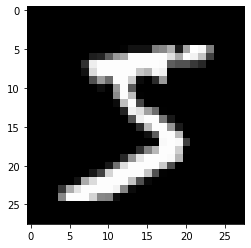

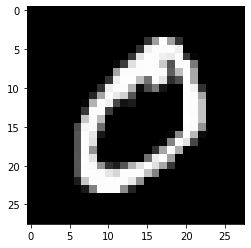

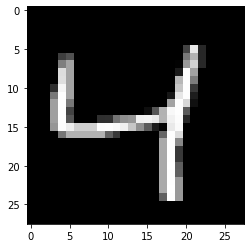

In [7]:
for i in range(3):
    img= mnist_train[i][0].numpy()
    plt.imshow(img[0],cmap='gray')
    plt.show()

### 3) Set DataLoader

In [8]:
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size, shuffle=True,num_workers=2,drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size, shuffle=False,num_workers=2,drop_last=True)

## 4. Model & Optimizer

### 1) NN Model

In [9]:
class Linear(nn.Module):    # NN 모델을 클래스로 정의함. 반드시 __init__()와 forward() 메소드를 정의해 주어야 함
    def __init__(self):
        super(Linear,self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(784,50),
            nn.ReLU(),
            nn.Linear(50,100),
            nn.ReLU(),
            nn.Linear(100,10),
            nn.ReLU()
        )       
        
    def forward(self,x):
        out = x.view(batch_size,-1)
        out = self.layer(out)

        return out

model = Linear()

### 2) Loss func & Optimizer

In [10]:
loss_func = nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## 5. Train 

In [11]:
for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        x = Variable(image)
        y_= Variable(label)
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output,y_)
        loss.backward()
        optimizer.step()
        
        if j % 100 == 0:
            print(i,j,loss.data)
            
print("Done!")

0 0 tensor(2.3020)
0 100 tensor(1.7438)
0 200 tensor(1.1346)
0 300 tensor(1.0312)
0 400 tensor(0.8355)
0 500 tensor(0.8113)
1 0 tensor(0.8033)
1 100 tensor(0.8574)
1 200 tensor(0.6743)
1 300 tensor(0.6297)
1 400 tensor(0.6796)
1 500 tensor(0.7765)
2 0 tensor(0.8171)
2 100 tensor(0.7395)
2 200 tensor(0.7124)
2 300 tensor(0.7319)
2 400 tensor(0.6089)
2 500 tensor(0.7211)
3 0 tensor(0.6452)
3 100 tensor(0.5612)
3 200 tensor(0.6668)
3 300 tensor(0.7276)
3 400 tensor(0.6058)
3 500 tensor(1.0048)
4 0 tensor(0.5890)
4 100 tensor(0.6773)
4 200 tensor(0.5026)
4 300 tensor(0.6458)
4 400 tensor(0.5403)
4 500 tensor(0.5459)
5 0 tensor(0.6688)
5 100 tensor(0.5612)
5 200 tensor(0.5604)
5 300 tensor(0.6133)
5 400 tensor(0.7719)
5 500 tensor(0.5583)
6 0 tensor(0.5815)
6 100 tensor(0.4684)
6 200 tensor(0.4536)
6 300 tensor(0.4782)
6 400 tensor(0.7070)
6 500 tensor(0.4631)
7 0 tensor(0.5744)
7 100 tensor(0.6003)
7 200 tensor(0.6807)
7 300 tensor(0.5879)
7 400 tensor(0.4904)
7 500 tensor(0.6390)
8 0 tens

## 6. Test

In [15]:
correct = 0
total = 0

for image,label in test_loader:
    x = Variable(image,volatile=True)
    y_= Variable(label)

    output = model.forward(x)
    _,output_index = torch.max(output,1)
        
    total += label.size(0)
    correct += (output_index == y_).sum().float()
    
print("Accuracy of Test Data: {}".format(100*correct/total))

<ipython-input-15-f0f0c351236a>:5: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  x = Variable(image,volatile=True)


Accuracy of Test Data: 95.16000366210938
